<a href="https://colab.research.google.com/github/marlapinkert/TEWA2/blob/main/03_Neuroimaging_File_Formats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03 - Neuroimaging File Formats




Understanding MRI data can be tricky. Last session, we learned how MRI data is represented on our computers. Here, we'll have a look at how this MRI data gets from the scanner to the computer, how it is stored and how we can make sense of it. For this, we will use the command line & a Nipype interface.

Also, since the DataCamp tutorials did not include this, we will look into object-oriented programming.

*Questions*

- How is MRI data stored?
- How can we convert different file formats (using the command line)?
- What are objects in Python?
- What are Nipype interfaces? What's the difference to using the command line?

*Objective*

- Convert DICOM files to NIfTI (both using the command line and Nipype)

---

## Overview of neuroimaging file formats

There are different file formats to store MRI data. The most common ones are:

- **DICOM (.dcm)**:            Digital Imaging and Communications in Medicine
- **NIfTI (.nii or .nii.gz)**: Neuroimaging Informatics Technology Initiative
- **Analyze (.img and .hdr)**
- **Minc (.minc)**

For most scanners, images are initally collected in the DICOM format. Importantly, DICOM saves one file per slice. Thus, a prolonged scanning sessions may result in hundreds or thousands of single files. This is how it looks (note that every file is named with a unique identifier):

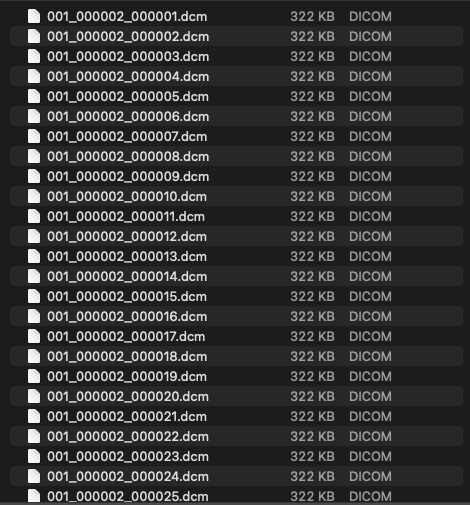

Performing complex operations on the MRI data, however, can be complicated with thousands of single files. That's why it's common to convert the DICOM files to a single NIfTI file as first step of data processing. One tool that can be used for this job is ```dcm2niix```. More information can be found [here](https://github.com/rordenlab/dcm2niix).

## Converting between neuroimaging file formats

### Setting up the environment

If you're running this notebook on Google colab, you can download a sample dicom dataset (downloaded from [here](https://wiki.idoimaging.com/index.php?title=Sample_Data)) and install ```dcm2niix``` by executing the two cells below (note that the ```!``` indicates a shell command)

In [1]:
# download dicom data
!mkdir /content/dicomdata
!wget https://data.idoimaging.com/dicom/1010_brain_mr/1010_brain_mr_02_lee.zip --no-check-certificate
!unzip 1010_brain_mr_02_lee.zip -d /content/dicomdata

# install packages
!pip install nipype
!pip install nilearn

# install dcm2niix
!sudo apt-get install dcm2niix

--2024-10-23 11:56:59--  https://data.idoimaging.com/dicom/1010_brain_mr/1010_brain_mr_02_lee.zip
Resolving data.idoimaging.com (data.idoimaging.com)... 3.163.189.121, 3.163.189.116, 3.163.189.110, ...
Connecting to data.idoimaging.com (data.idoimaging.com)|3.163.189.121|:443... connected.
  Issued certificate has expired.
HTTP request sent, awaiting response... 200 OK
Length: 8524230 (8.1M) [application/zip]
Saving to: ‘1010_brain_mr_02_lee.zip’

1010_brain_mr_02_le 100%[===================>]   8.13M  4.35MB/s    in 1.9s    

2024-10-23 11:57:02 (4.35 MB/s) - ‘1010_brain_mr_02_lee.zip’ saved [8524230/8524230]

Archive:  1010_brain_mr_02_lee.zip
   creating: /content/dicomdata/1010_brain_mr_02_lee/
  inflating: /content/dicomdata/1010_brain_mr_02_lee/img_000.dcm  
  inflating: /content/dicomdata/1010_brain_mr_02_lee/img_001.dcm  
  inflating: /content/dicomdata/1010_brain_mr_02_lee/img_002.dcm  
  inflating: /content/dicomdata/1010_brain_mr_02_lee/img_003.dcm  
  inflating: /content/di

In the cell above we
 - create a new directory for the dicom data (using ```mkdir```)
 - download the dicom data (using ```wget```)
 - unzip the compressed data (using the ```unzip```) function. The ```-d``` specifies the destination of the unzipped files, namely the directory we created in the first step

 Furthermore, we install Nipype and Nilearn using ```pip```.

 Finally, we install ```dcm2niix``` using ```apt-get```.

 *Background info: ```apt-get``` is used to download and install packages from Ubuntu repositories whereas as ```pip``` is used to download and install packages from [PyPI](https://pypi.org) - the official Python package index*

### ```dcm2niix``` as a command line tool

Originally, ```dcm2niix``` was designed for command line usage. That is, just like shell commands we learned about before (e.g., ```mkdir```, ```unzip``` or ```wget```) we can run it directly through the command line (or by suffixing a ```!``` in the case of Colab/Jupyter). This also means it doesn't come with a graphical user interface (GUI). Thus, it makes sense to have a look at the arguments (also called "flags") ```dcm2niix``` takes. You can find additional information by providing the  ``` -help```  flag  to  ```dcm2niix```:

In [2]:
!dcm2niix -help

Chris Rorden's dcm2niiX version v1.0.20211006  (JP2:OpenJPEG) GCC11.2.0 x86-64 (64-bit Linux)
usage: dcm2niix [options] <in_folder>
 Options :
  -1..-9 : gz compression level (1=fastest..9=smallest, default 6)
  -a : adjacent DICOMs (images from same series always in same folder) for faster conversion (n/y, default n)
  -b : BIDS sidecar (y/n/o [o=only: no NIfTI], default y)
   -ba : anonymize BIDS (y/n, default y)
  -c : comment stored in NIfTI aux_file (provide up to 24 characters e.g. '-c first_visit')
  -d : directory search depth. Convert DICOMs in sub-folders of in_folder? (0..9, default 5)
  -e : export as NRRD (y) or MGH (o) instead of NIfTI (y/n/o, default n)
  -f : filename (%a=antenna (coil) name, %b=basename, %c=comments, %d=description, %e=echo number, %f=folder name, %g=accession number, %i=ID of patient, %j=seriesInstanceUID, %k=studyInstanceUID, %m=manufacturer, %n=name of patient, %o=mediaObjectInstanceUID, %p=protocol, %r=instance number, %s=series number, %t=time, %u

Now, lets convert the DICOM files to a single NIfTI file. But first we have to create an output folder - again by using the ```mkdir``` command:

In [3]:
!mkdir /content/dicomdata/nifti

With our newly created output folder where are good to go and can run ```dcm2niix``` via the command line. Using the ```-o``` flag we specify where the converted file should be stored:

In [4]:
!dcm2niix -o  /content/dicomdata/nifti y /content/dicomdata/1010_brain_mr_02_lee

Chris Rorden's dcm2niiX version v1.0.20211006  (JP2:OpenJPEG) GCC11.2.0 x86-64 (64-bit Linux)
Found 192 DICOM file(s)
Convert 192 DICOM as /content/dicomdata/nifti/1010_brain_mr_02_lee_T1_AX_20080801000000_2 (192x256x192x1)
Conversion required 0.185560 seconds (0.183324 for core code).


Great! In the output there should be now two files: One with a ```.nii``` file extension (this is our data) and one with ```.json``` file extension (this is a so called json sidecar where DICOM metadata is preserved)

### Object-Oriented Programming

Before we get into how it is possible to do this exact same thing in Python using a Nipype interface, we will do an introduction to object-oriented programming. This will probably help you understand Nipype interfaces better. If you want to become more proficient with object-oriented programming, you could also try [this tutorial](https://www.datacamp.com/courses/introduction-to-object-oriented-programming-in-python) on DataCamp.

Object-oriented programming is a "programming paradigm" that uses classes and objects. It has many advantages when developing your own programs and tools, and although you do not need to create your own "classes and objects", you will still use them throughout this semester.

So, what are objects and classes? One way to think about **classes** is to view them as a sort of construction plan, or blueprint. Imagine a development area in a town where many very similar looking houses are built. Usually, these sorts of building projects still offer buyers certain customization options - such as the color, the doors, whether there is a garage. So, the construction plan (class) already contains all the information for building the house, and the custommized houses themselves would then correspond to different **objects** derived fromm the **class**.

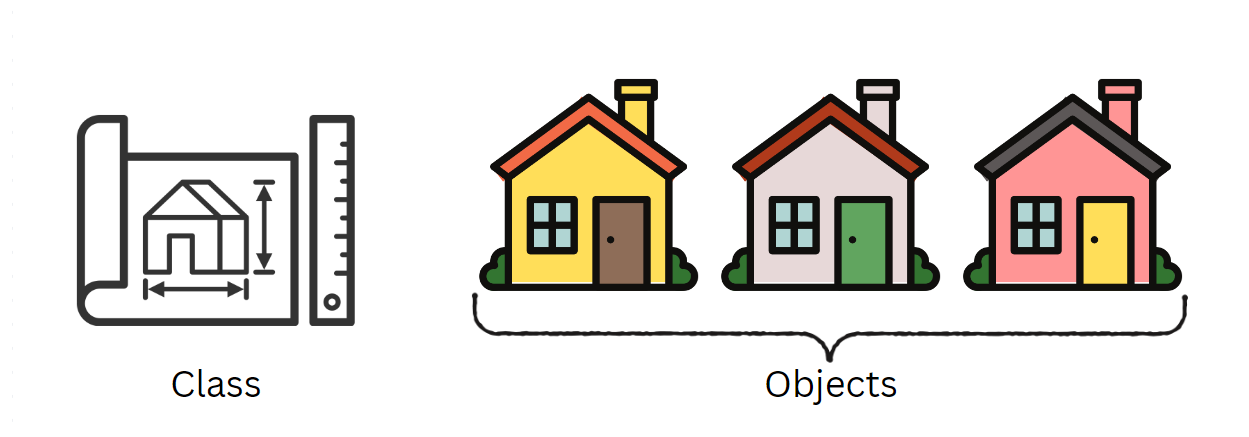

What does this look like in practice? Let's create a very simple class called "Person" which can be used to create a little profile of different people

In [5]:
class Person():

    # instance attribute
    def __init__(self, name, age):
        self.name = name
        self.age = age

This is now our "construction plan/blueprint" - the **class**. Let's use this to create a profile for me - this means we create an **object**.

In [6]:
marla = Person("Marla", 24)

We can now access the attributes of our object - name and age. Remember, we access attributes by typing a "." and the attribute behind our object.

In [7]:
marla.age

24

A class can also contain methods. In our case, we want to know our age in dog years. We can achieve this using this formula:

dog_age = np.exp(1/16 * human_age- 31/16)

In [79]:
import numpy as np

class Person():

    # instance attribute
    def __init__(self, name, age):
        self.name = name
        self.age = age

    # instance method for dog years
    def dog_years(self):
        self.dog_age = np.exp(1/16 * self.age - 31/16)
        print(f"This person is aged {round(self.dog_age, 2)} years in dog years.")

In [81]:
marla = Person("Marla", 24)
marla.dog_years()
marla.dog_age

This person is aged 0.65 years in dog years.


0.645648526427892

This seems too young to me! If we look at how much this is in months, I would only be about 8 months old.

In [78]:
round(marla.dog_age * 12)

8

You can also try this with your data, just create your own copy - **object** - from the `Person()` **class** we created above :)

### ```dcm2niix``` as a Nipype interface

Above we have converted the DICOM files using the command line. However, we can also run ```dcm2niix``` within Python by using the respective **Nipype** interface.


#### What's Nipype about?

You will learn more about Nipype in the upcoming weeks (and by actualling applying it). For starters, Nipype is an open-source project that allows for integrating a variety of different neuroimaging softwares into a single workflow (and there are *a lot* of different software tools for neuroimaging analysis, like [SPM](https://www.fil.ion.ucl.ac.uk/spm/software/), [FSL](https://fsl.fmrib.ox.ac.uk/fsl/fslwiki) or [AFNI](https://afni.nimh.nih.gov) - just to name a few of them).

In Nipype's context *interfaces* are wrappers that allow Nipype to run programs that are written in languages other than Python (like ```dcm2niix``` for example). This way, we can integrate virtually every available neuroimaging tool within the same environment. You can find a small tutorial on interfaces [here](https://nipype.readthedocs.io/en/0.11.0/users/interface_tutorial.html).

#### Using Nipype to convert dicoms

Before we start using ```dcm2niix``` as a Nipype interface, let's create a new output folder:

In [84]:
!mkdir /content/dicomdata/nifti_nipype

Now we have to import the ```Dcm2niix``` **class** that wraps the functionality of the program within Python.

The ```nipype.interfaces``` module gives us access to several external software packages. You can find a list of all the available packages [here](https://nipype.readthedocs.io/en/latest/api/generated/nipype.interfaces.html).

Now, let's import the ```Dcm2niix``` class from the [dcm2nii module](https://nipype.readthedocs.io/en/latest/api/generated/nipype.interfaces.dcm2nii.html):

In [85]:
from nipype.interfaces.dcm2nii import Dcm2niix

First, let's have a look at the [docstring](https://peps.python.org/pep-0257/) of the ```Dcm2niix``` class (further information can be found in the official [documentation](https://nipype.readthedocs.io/en/latest/api/generated/nipype.interfaces.dcm2nii.html#dcm2niix)):

In [86]:
?Dcm2niix

Note how this info relates to the info we got when running ```dcm2niix``` as a command line tool and by passing the ```-help``` flag.

The first step when using interfaces is always to create an **object** (or: instance) of the respective interface **class** (in this case the ```Dcm2niix``` class):

In [87]:
converter = Dcm2niix()

For ```dcm2niix``` to run we need to provide two mandatory arguments - input and output directory:

In [89]:
converter.inputs.source_dir = "/content/dicomdata/1010_brain_mr_02_lee"
converter.inputs.output_dir = "/content/dicomdata/nifti_nipype"

Besides input and output directory names, there are further (optional) attributes attached to the ```Dcm2niix``` object (you can list all of them by using the command ```print(dir(converter))```).

In [90]:
print(dir(converter))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_additional_metadata', '_always_run', '_can_resume', '_check_mandatory_inputs', '_check_requires', '_check_version_requirements', '_check_xor', '_cmd', '_cmd_prefix', '_duecredit_cite', '_environ', '_etelemetry_version_data', '_filename_from_source', '_format_arg', '_gen_filename', '_get_environ', '_get_filecopy_info', '_ldd', '_list_outputs', '_outputs', '_overload_extension', '_parse_files', '_parse_inputs', '_parse_stdout', '_post_run_hook', '_pre_run_hook', '_redirect_x', '_references', '_run_interface', '_terminal_output', '_version', '_write_cmdline', 'aggregate_outputs', 'always_run', 'can_resume', 'cmd', 'cmdline', 'help', 'ignore_excepti

One attribute that you can find in almost every Nipype class is called ```cmdline```. It basically tells us the way the command will be run on our computer. Remember that Nipype is just a wrapper - "under the hood" ```dcm2niix``` will be run the same way as above when we used it directly as a command line tool. Thus you can think of Nipype as a way to set up these commands within a Python environment (with the main benefit being the ability to integrate a wide variety of different software tools).

Alright, let's have a look at the command that Nipype has created for us:

In [91]:
print(converter.cmdline)

dcm2niix -b y -z y -x n -t n -m n -o /content/dicomdata/nifti_nipype -s n -v n /content/dicomdata/1010_brain_mr_02_lee


Note that there are way more flags included in the command Nipype created compared the one we created ourselves above. This is because a lot of optional functionalities are turned on by default. For example, the attribute ```bids_format``` (which maps to the command line flag ```-b```) is set to ```True``` by default. Check the [documentation](https://nipype.readthedocs.io/en/latest/api/generated/nipype.interfaces.dcm2nii.html#dcm2niix) of the class to see how the different attributes relate to the command line arguments.

Now that we have instantiated our ```Dcm2niix``` object and provided the mandatory inputs we can go ahead and run the interface using the ```run()``` method. This procedure is common to almost all Nipype interface: First, instanstiate the object of a specific interface class, provide mandatory and optional inputs and then actually run it by using the ```run()``` method.

In [92]:
converter.run()

241023-13:28:17,400 nipype.interface INFO:
	 stdout 2024-10-23T13:28:17.400708:Chris Rorden's dcm2niiX version v1.0.20211006  (JP2:OpenJPEG) GCC11.2.0 x86-64 (64-bit Linux)


INFO:nipype.interface:stdout 2024-10-23T13:28:17.400708:Chris Rorden's dcm2niiX version v1.0.20211006  (JP2:OpenJPEG) GCC11.2.0 x86-64 (64-bit Linux)


241023-13:28:17,408 nipype.interface INFO:
	 stdout 2024-10-23T13:28:17.400708:Found 192 DICOM file(s)


INFO:nipype.interface:stdout 2024-10-23T13:28:17.400708:Found 192 DICOM file(s)


241023-13:28:17,415 nipype.interface INFO:
	 stdout 2024-10-23T13:28:17.400708:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2024-10-23T13:28:17.400708:Warning: Unknown manufacturer Manufacturer


241023-13:28:17,420 nipype.interface INFO:
	 stdout 2024-10-23T13:28:17.400708:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2024-10-23T13:28:17.400708:Warning: Unknown manufacturer Manufacturer


241023-13:28:17,424 nipype.interface INFO:
	 stdout 2024-10-23T13:28:17.400708:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2024-10-23T13:28:17.400708:Warning: Unknown manufacturer Manufacturer


241023-13:28:17,430 nipype.interface INFO:
	 stdout 2024-10-23T13:28:17.400708:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2024-10-23T13:28:17.400708:Warning: Unknown manufacturer Manufacturer


241023-13:28:17,434 nipype.interface INFO:
	 stdout 2024-10-23T13:28:17.400708:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2024-10-23T13:28:17.400708:Warning: Unknown manufacturer Manufacturer


241023-13:28:17,438 nipype.interface INFO:
	 stdout 2024-10-23T13:28:17.400708:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2024-10-23T13:28:17.400708:Warning: Unknown manufacturer Manufacturer


241023-13:28:17,444 nipype.interface INFO:
	 stdout 2024-10-23T13:28:17.400708:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2024-10-23T13:28:17.400708:Warning: Unknown manufacturer Manufacturer


241023-13:28:17,450 nipype.interface INFO:
	 stdout 2024-10-23T13:28:17.400708:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2024-10-23T13:28:17.400708:Warning: Unknown manufacturer Manufacturer


241023-13:28:17,453 nipype.interface INFO:
	 stdout 2024-10-23T13:28:17.400708:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2024-10-23T13:28:17.400708:Warning: Unknown manufacturer Manufacturer


241023-13:28:17,461 nipype.interface INFO:
	 stdout 2024-10-23T13:28:17.400708:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2024-10-23T13:28:17.400708:Warning: Unknown manufacturer Manufacturer


241023-13:28:17,467 nipype.interface INFO:
	 stdout 2024-10-23T13:28:17.400708:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2024-10-23T13:28:17.400708:Warning: Unknown manufacturer Manufacturer


241023-13:28:17,473 nipype.interface INFO:
	 stdout 2024-10-23T13:28:17.400708:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2024-10-23T13:28:17.400708:Warning: Unknown manufacturer Manufacturer


241023-13:28:17,476 nipype.interface INFO:
	 stdout 2024-10-23T13:28:17.400708:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2024-10-23T13:28:17.400708:Warning: Unknown manufacturer Manufacturer


241023-13:28:17,482 nipype.interface INFO:
	 stdout 2024-10-23T13:28:17.400708:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2024-10-23T13:28:17.400708:Warning: Unknown manufacturer Manufacturer


241023-13:28:17,488 nipype.interface INFO:
	 stdout 2024-10-23T13:28:17.400708:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2024-10-23T13:28:17.400708:Warning: Unknown manufacturer Manufacturer


241023-13:28:17,490 nipype.interface INFO:
	 stdout 2024-10-23T13:28:17.400708:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2024-10-23T13:28:17.400708:Warning: Unknown manufacturer Manufacturer


241023-13:28:17,494 nipype.interface INFO:
	 stdout 2024-10-23T13:28:17.400708:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2024-10-23T13:28:17.400708:Warning: Unknown manufacturer Manufacturer


241023-13:28:17,500 nipype.interface INFO:
	 stdout 2024-10-23T13:28:17.400708:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2024-10-23T13:28:17.400708:Warning: Unknown manufacturer Manufacturer


241023-13:28:17,503 nipype.interface INFO:
	 stdout 2024-10-23T13:28:17.400708:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2024-10-23T13:28:17.400708:Warning: Unknown manufacturer Manufacturer


241023-13:28:17,509 nipype.interface INFO:
	 stdout 2024-10-23T13:28:17.400708:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2024-10-23T13:28:17.400708:Warning: Unknown manufacturer Manufacturer


241023-13:28:17,515 nipype.interface INFO:
	 stdout 2024-10-23T13:28:17.400708:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2024-10-23T13:28:17.400708:Warning: Unknown manufacturer Manufacturer


241023-13:28:17,520 nipype.interface INFO:
	 stdout 2024-10-23T13:28:17.400708:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2024-10-23T13:28:17.400708:Warning: Unknown manufacturer Manufacturer


241023-13:28:17,524 nipype.interface INFO:
	 stdout 2024-10-23T13:28:17.400708:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2024-10-23T13:28:17.400708:Warning: Unknown manufacturer Manufacturer


241023-13:28:17,527 nipype.interface INFO:
	 stdout 2024-10-23T13:28:17.400708:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2024-10-23T13:28:17.400708:Warning: Unknown manufacturer Manufacturer


241023-13:28:17,531 nipype.interface INFO:
	 stdout 2024-10-23T13:28:17.400708:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2024-10-23T13:28:17.400708:Warning: Unknown manufacturer Manufacturer


241023-13:28:17,533 nipype.interface INFO:
	 stdout 2024-10-23T13:28:17.400708:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2024-10-23T13:28:17.400708:Warning: Unknown manufacturer Manufacturer


241023-13:28:17,537 nipype.interface INFO:
	 stdout 2024-10-23T13:28:17.400708:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2024-10-23T13:28:17.400708:Warning: Unknown manufacturer Manufacturer


241023-13:28:17,540 nipype.interface INFO:
	 stdout 2024-10-23T13:28:17.400708:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2024-10-23T13:28:17.400708:Warning: Unknown manufacturer Manufacturer


241023-13:28:17,544 nipype.interface INFO:
	 stdout 2024-10-23T13:28:17.400708:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2024-10-23T13:28:17.400708:Warning: Unknown manufacturer Manufacturer


241023-13:28:17,547 nipype.interface INFO:
	 stdout 2024-10-23T13:28:17.400708:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2024-10-23T13:28:17.400708:Warning: Unknown manufacturer Manufacturer


241023-13:28:17,549 nipype.interface INFO:
	 stdout 2024-10-23T13:28:17.400708:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2024-10-23T13:28:17.400708:Warning: Unknown manufacturer Manufacturer


241023-13:28:17,552 nipype.interface INFO:
	 stdout 2024-10-23T13:28:17.400708:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2024-10-23T13:28:17.400708:Warning: Unknown manufacturer Manufacturer


241023-13:28:17,557 nipype.interface INFO:
	 stdout 2024-10-23T13:28:17.400708:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2024-10-23T13:28:17.400708:Warning: Unknown manufacturer Manufacturer


241023-13:28:17,559 nipype.interface INFO:
	 stdout 2024-10-23T13:28:17.400708:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2024-10-23T13:28:17.400708:Warning: Unknown manufacturer Manufacturer


241023-13:28:17,561 nipype.interface INFO:
	 stdout 2024-10-23T13:28:17.400708:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2024-10-23T13:28:17.400708:Warning: Unknown manufacturer Manufacturer


241023-13:28:17,564 nipype.interface INFO:
	 stdout 2024-10-23T13:28:17.400708:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2024-10-23T13:28:17.400708:Warning: Unknown manufacturer Manufacturer


241023-13:28:17,567 nipype.interface INFO:
	 stdout 2024-10-23T13:28:17.400708:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2024-10-23T13:28:17.400708:Warning: Unknown manufacturer Manufacturer


241023-13:28:17,571 nipype.interface INFO:
	 stdout 2024-10-23T13:28:17.400708:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2024-10-23T13:28:17.400708:Warning: Unknown manufacturer Manufacturer


241023-13:28:17,574 nipype.interface INFO:
	 stdout 2024-10-23T13:28:17.400708:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2024-10-23T13:28:17.400708:Warning: Unknown manufacturer Manufacturer


241023-13:28:17,577 nipype.interface INFO:
	 stdout 2024-10-23T13:28:17.400708:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2024-10-23T13:28:17.400708:Warning: Unknown manufacturer Manufacturer


241023-13:28:17,581 nipype.interface INFO:
	 stdout 2024-10-23T13:28:17.400708:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2024-10-23T13:28:17.400708:Warning: Unknown manufacturer Manufacturer


241023-13:28:17,585 nipype.interface INFO:
	 stdout 2024-10-23T13:28:17.400708:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2024-10-23T13:28:17.400708:Warning: Unknown manufacturer Manufacturer


241023-13:28:17,590 nipype.interface INFO:
	 stdout 2024-10-23T13:28:17.400708:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2024-10-23T13:28:17.400708:Warning: Unknown manufacturer Manufacturer


241023-13:28:17,593 nipype.interface INFO:
	 stdout 2024-10-23T13:28:17.400708:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2024-10-23T13:28:17.400708:Warning: Unknown manufacturer Manufacturer


241023-13:28:17,597 nipype.interface INFO:
	 stdout 2024-10-23T13:28:17.400708:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2024-10-23T13:28:17.400708:Warning: Unknown manufacturer Manufacturer


241023-13:28:17,600 nipype.interface INFO:
	 stdout 2024-10-23T13:28:17.400708:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2024-10-23T13:28:17.400708:Warning: Unknown manufacturer Manufacturer


241023-13:28:17,604 nipype.interface INFO:
	 stdout 2024-10-23T13:28:17.400708:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2024-10-23T13:28:17.400708:Warning: Unknown manufacturer Manufacturer


241023-13:28:17,608 nipype.interface INFO:
	 stdout 2024-10-23T13:28:17.400708:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2024-10-23T13:28:17.400708:Warning: Unknown manufacturer Manufacturer


241023-13:28:17,611 nipype.interface INFO:
	 stdout 2024-10-23T13:28:17.400708:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2024-10-23T13:28:17.400708:Warning: Unknown manufacturer Manufacturer


241023-13:28:17,614 nipype.interface INFO:
	 stdout 2024-10-23T13:28:17.400708:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2024-10-23T13:28:17.400708:Warning: Unknown manufacturer Manufacturer


241023-13:28:17,619 nipype.interface INFO:
	 stdout 2024-10-23T13:28:17.400708:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2024-10-23T13:28:17.400708:Warning: Unknown manufacturer Manufacturer


241023-13:28:17,621 nipype.interface INFO:
	 stdout 2024-10-23T13:28:17.400708:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2024-10-23T13:28:17.400708:Warning: Unknown manufacturer Manufacturer


241023-13:28:17,625 nipype.interface INFO:
	 stdout 2024-10-23T13:28:17.400708:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2024-10-23T13:28:17.400708:Warning: Unknown manufacturer Manufacturer


241023-13:28:17,629 nipype.interface INFO:
	 stdout 2024-10-23T13:28:17.400708:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2024-10-23T13:28:17.400708:Warning: Unknown manufacturer Manufacturer


241023-13:28:17,632 nipype.interface INFO:
	 stdout 2024-10-23T13:28:17.400708:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2024-10-23T13:28:17.400708:Warning: Unknown manufacturer Manufacturer


241023-13:28:17,636 nipype.interface INFO:
	 stdout 2024-10-23T13:28:17.400708:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2024-10-23T13:28:17.400708:Warning: Unknown manufacturer Manufacturer


241023-13:28:17,640 nipype.interface INFO:
	 stdout 2024-10-23T13:28:17.400708:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2024-10-23T13:28:17.400708:Warning: Unknown manufacturer Manufacturer


241023-13:28:17,643 nipype.interface INFO:
	 stdout 2024-10-23T13:28:17.400708:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2024-10-23T13:28:17.400708:Warning: Unknown manufacturer Manufacturer


241023-13:28:17,648 nipype.interface INFO:
	 stdout 2024-10-23T13:28:17.400708:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2024-10-23T13:28:17.400708:Warning: Unknown manufacturer Manufacturer


241023-13:28:17,650 nipype.interface INFO:
	 stdout 2024-10-23T13:28:17.400708:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2024-10-23T13:28:17.400708:Warning: Unknown manufacturer Manufacturer


241023-13:28:17,655 nipype.interface INFO:
	 stdout 2024-10-23T13:28:17.400708:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2024-10-23T13:28:17.400708:Warning: Unknown manufacturer Manufacturer


241023-13:28:17,658 nipype.interface INFO:
	 stdout 2024-10-23T13:28:17.400708:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2024-10-23T13:28:17.400708:Warning: Unknown manufacturer Manufacturer


241023-13:28:17,664 nipype.interface INFO:
	 stdout 2024-10-23T13:28:17.400708:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2024-10-23T13:28:17.400708:Warning: Unknown manufacturer Manufacturer


241023-13:28:17,667 nipype.interface INFO:
	 stdout 2024-10-23T13:28:17.400708:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2024-10-23T13:28:17.400708:Warning: Unknown manufacturer Manufacturer


241023-13:28:17,670 nipype.interface INFO:
	 stdout 2024-10-23T13:28:17.400708:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2024-10-23T13:28:17.400708:Warning: Unknown manufacturer Manufacturer


241023-13:28:17,675 nipype.interface INFO:
	 stdout 2024-10-23T13:28:17.400708:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2024-10-23T13:28:17.400708:Warning: Unknown manufacturer Manufacturer


241023-13:28:17,679 nipype.interface INFO:
	 stdout 2024-10-23T13:28:17.400708:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2024-10-23T13:28:17.400708:Warning: Unknown manufacturer Manufacturer


241023-13:28:17,682 nipype.interface INFO:
	 stdout 2024-10-23T13:28:17.400708:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2024-10-23T13:28:17.400708:Warning: Unknown manufacturer Manufacturer


241023-13:28:17,689 nipype.interface INFO:
	 stdout 2024-10-23T13:28:17.400708:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2024-10-23T13:28:17.400708:Warning: Unknown manufacturer Manufacturer


241023-13:28:17,691 nipype.interface INFO:
	 stdout 2024-10-23T13:28:17.400708:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2024-10-23T13:28:17.400708:Warning: Unknown manufacturer Manufacturer


241023-13:28:17,696 nipype.interface INFO:
	 stdout 2024-10-23T13:28:17.400708:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2024-10-23T13:28:17.400708:Warning: Unknown manufacturer Manufacturer


241023-13:28:17,702 nipype.interface INFO:
	 stdout 2024-10-23T13:28:17.400708:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2024-10-23T13:28:17.400708:Warning: Unknown manufacturer Manufacturer


241023-13:28:17,707 nipype.interface INFO:
	 stdout 2024-10-23T13:28:17.400708:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2024-10-23T13:28:17.400708:Warning: Unknown manufacturer Manufacturer


241023-13:28:17,713 nipype.interface INFO:
	 stdout 2024-10-23T13:28:17.400708:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2024-10-23T13:28:17.400708:Warning: Unknown manufacturer Manufacturer


241023-13:28:17,719 nipype.interface INFO:
	 stdout 2024-10-23T13:28:17.400708:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2024-10-23T13:28:17.400708:Warning: Unknown manufacturer Manufacturer


241023-13:28:17,726 nipype.interface INFO:
	 stdout 2024-10-23T13:28:17.400708:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2024-10-23T13:28:17.400708:Warning: Unknown manufacturer Manufacturer


241023-13:28:17,729 nipype.interface INFO:
	 stdout 2024-10-23T13:28:17.400708:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2024-10-23T13:28:17.400708:Warning: Unknown manufacturer Manufacturer


241023-13:28:17,735 nipype.interface INFO:
	 stdout 2024-10-23T13:28:17.400708:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2024-10-23T13:28:17.400708:Warning: Unknown manufacturer Manufacturer


241023-13:28:17,738 nipype.interface INFO:
	 stdout 2024-10-23T13:28:17.400708:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2024-10-23T13:28:17.400708:Warning: Unknown manufacturer Manufacturer


241023-13:28:17,748 nipype.interface INFO:
	 stdout 2024-10-23T13:28:17.400708:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2024-10-23T13:28:17.400708:Warning: Unknown manufacturer Manufacturer


241023-13:28:17,751 nipype.interface INFO:
	 stdout 2024-10-23T13:28:17.400708:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2024-10-23T13:28:17.400708:Warning: Unknown manufacturer Manufacturer


241023-13:28:17,756 nipype.interface INFO:
	 stdout 2024-10-23T13:28:17.400708:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2024-10-23T13:28:17.400708:Warning: Unknown manufacturer Manufacturer


241023-13:28:17,763 nipype.interface INFO:
	 stdout 2024-10-23T13:28:17.400708:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2024-10-23T13:28:17.400708:Warning: Unknown manufacturer Manufacturer


241023-13:28:17,769 nipype.interface INFO:
	 stdout 2024-10-23T13:28:17.400708:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2024-10-23T13:28:17.400708:Warning: Unknown manufacturer Manufacturer


241023-13:28:17,776 nipype.interface INFO:
	 stdout 2024-10-23T13:28:17.400708:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2024-10-23T13:28:17.400708:Warning: Unknown manufacturer Manufacturer


241023-13:28:17,783 nipype.interface INFO:
	 stdout 2024-10-23T13:28:17.400708:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2024-10-23T13:28:17.400708:Warning: Unknown manufacturer Manufacturer


241023-13:28:17,789 nipype.interface INFO:
	 stdout 2024-10-23T13:28:17.400708:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2024-10-23T13:28:17.400708:Warning: Unknown manufacturer Manufacturer


241023-13:28:17,796 nipype.interface INFO:
	 stdout 2024-10-23T13:28:17.400708:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2024-10-23T13:28:17.400708:Warning: Unknown manufacturer Manufacturer


241023-13:28:17,799 nipype.interface INFO:
	 stdout 2024-10-23T13:28:17.400708:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2024-10-23T13:28:17.400708:Warning: Unknown manufacturer Manufacturer


241023-13:28:17,805 nipype.interface INFO:
	 stdout 2024-10-23T13:28:17.400708:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2024-10-23T13:28:17.400708:Warning: Unknown manufacturer Manufacturer


241023-13:28:17,809 nipype.interface INFO:
	 stdout 2024-10-23T13:28:17.400708:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2024-10-23T13:28:17.400708:Warning: Unknown manufacturer Manufacturer


241023-13:28:17,813 nipype.interface INFO:
	 stdout 2024-10-23T13:28:17.400708:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2024-10-23T13:28:17.400708:Warning: Unknown manufacturer Manufacturer


241023-13:28:17,817 nipype.interface INFO:
	 stdout 2024-10-23T13:28:17.817702:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2024-10-23T13:28:17.817702:Warning: Unknown manufacturer Manufacturer


241023-13:28:17,822 nipype.interface INFO:
	 stdout 2024-10-23T13:28:17.817702:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2024-10-23T13:28:17.817702:Warning: Unknown manufacturer Manufacturer


241023-13:28:17,826 nipype.interface INFO:
	 stdout 2024-10-23T13:28:17.817702:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2024-10-23T13:28:17.817702:Warning: Unknown manufacturer Manufacturer


241023-13:28:17,829 nipype.interface INFO:
	 stdout 2024-10-23T13:28:17.817702:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2024-10-23T13:28:17.817702:Warning: Unknown manufacturer Manufacturer


241023-13:28:17,831 nipype.interface INFO:
	 stdout 2024-10-23T13:28:17.817702:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2024-10-23T13:28:17.817702:Warning: Unknown manufacturer Manufacturer


241023-13:28:17,836 nipype.interface INFO:
	 stdout 2024-10-23T13:28:17.817702:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2024-10-23T13:28:17.817702:Warning: Unknown manufacturer Manufacturer


241023-13:28:17,840 nipype.interface INFO:
	 stdout 2024-10-23T13:28:17.817702:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2024-10-23T13:28:17.817702:Warning: Unknown manufacturer Manufacturer


241023-13:28:17,843 nipype.interface INFO:
	 stdout 2024-10-23T13:28:17.817702:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2024-10-23T13:28:17.817702:Warning: Unknown manufacturer Manufacturer


241023-13:28:17,847 nipype.interface INFO:
	 stdout 2024-10-23T13:28:17.817702:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2024-10-23T13:28:17.817702:Warning: Unknown manufacturer Manufacturer


241023-13:28:17,852 nipype.interface INFO:
	 stdout 2024-10-23T13:28:17.817702:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2024-10-23T13:28:17.817702:Warning: Unknown manufacturer Manufacturer


241023-13:28:17,859 nipype.interface INFO:
	 stdout 2024-10-23T13:28:17.817702:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2024-10-23T13:28:17.817702:Warning: Unknown manufacturer Manufacturer


241023-13:28:17,866 nipype.interface INFO:
	 stdout 2024-10-23T13:28:17.817702:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2024-10-23T13:28:17.817702:Warning: Unknown manufacturer Manufacturer


241023-13:28:17,869 nipype.interface INFO:
	 stdout 2024-10-23T13:28:17.817702:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2024-10-23T13:28:17.817702:Warning: Unknown manufacturer Manufacturer


241023-13:28:17,872 nipype.interface INFO:
	 stdout 2024-10-23T13:28:17.817702:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2024-10-23T13:28:17.817702:Warning: Unknown manufacturer Manufacturer


241023-13:28:17,875 nipype.interface INFO:
	 stdout 2024-10-23T13:28:17.817702:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2024-10-23T13:28:17.817702:Warning: Unknown manufacturer Manufacturer


241023-13:28:17,877 nipype.interface INFO:
	 stdout 2024-10-23T13:28:17.817702:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2024-10-23T13:28:17.817702:Warning: Unknown manufacturer Manufacturer


241023-13:28:17,880 nipype.interface INFO:
	 stdout 2024-10-23T13:28:17.817702:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2024-10-23T13:28:17.817702:Warning: Unknown manufacturer Manufacturer


241023-13:28:17,884 nipype.interface INFO:
	 stdout 2024-10-23T13:28:17.817702:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2024-10-23T13:28:17.817702:Warning: Unknown manufacturer Manufacturer


241023-13:28:17,888 nipype.interface INFO:
	 stdout 2024-10-23T13:28:17.817702:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2024-10-23T13:28:17.817702:Warning: Unknown manufacturer Manufacturer


241023-13:28:17,891 nipype.interface INFO:
	 stdout 2024-10-23T13:28:17.817702:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2024-10-23T13:28:17.817702:Warning: Unknown manufacturer Manufacturer


241023-13:28:17,893 nipype.interface INFO:
	 stdout 2024-10-23T13:28:17.817702:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2024-10-23T13:28:17.817702:Warning: Unknown manufacturer Manufacturer


241023-13:28:17,896 nipype.interface INFO:
	 stdout 2024-10-23T13:28:17.817702:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2024-10-23T13:28:17.817702:Warning: Unknown manufacturer Manufacturer


241023-13:28:17,899 nipype.interface INFO:
	 stdout 2024-10-23T13:28:17.817702:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2024-10-23T13:28:17.817702:Warning: Unknown manufacturer Manufacturer


241023-13:28:17,902 nipype.interface INFO:
	 stdout 2024-10-23T13:28:17.817702:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2024-10-23T13:28:17.817702:Warning: Unknown manufacturer Manufacturer


241023-13:28:17,905 nipype.interface INFO:
	 stdout 2024-10-23T13:28:17.817702:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2024-10-23T13:28:17.817702:Warning: Unknown manufacturer Manufacturer


241023-13:28:17,907 nipype.interface INFO:
	 stdout 2024-10-23T13:28:17.817702:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2024-10-23T13:28:17.817702:Warning: Unknown manufacturer Manufacturer


241023-13:28:17,910 nipype.interface INFO:
	 stdout 2024-10-23T13:28:17.817702:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2024-10-23T13:28:17.817702:Warning: Unknown manufacturer Manufacturer


241023-13:28:17,913 nipype.interface INFO:
	 stdout 2024-10-23T13:28:17.817702:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2024-10-23T13:28:17.817702:Warning: Unknown manufacturer Manufacturer


241023-13:28:17,916 nipype.interface INFO:
	 stdout 2024-10-23T13:28:17.817702:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2024-10-23T13:28:17.817702:Warning: Unknown manufacturer Manufacturer


241023-13:28:17,923 nipype.interface INFO:
	 stdout 2024-10-23T13:28:17.817702:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2024-10-23T13:28:17.817702:Warning: Unknown manufacturer Manufacturer


241023-13:28:17,926 nipype.interface INFO:
	 stdout 2024-10-23T13:28:17.817702:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2024-10-23T13:28:17.817702:Warning: Unknown manufacturer Manufacturer


241023-13:28:17,930 nipype.interface INFO:
	 stdout 2024-10-23T13:28:17.817702:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2024-10-23T13:28:17.817702:Warning: Unknown manufacturer Manufacturer


241023-13:28:17,932 nipype.interface INFO:
	 stdout 2024-10-23T13:28:17.817702:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2024-10-23T13:28:17.817702:Warning: Unknown manufacturer Manufacturer


241023-13:28:17,935 nipype.interface INFO:
	 stdout 2024-10-23T13:28:17.817702:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2024-10-23T13:28:17.817702:Warning: Unknown manufacturer Manufacturer


241023-13:28:17,937 nipype.interface INFO:
	 stdout 2024-10-23T13:28:17.817702:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2024-10-23T13:28:17.817702:Warning: Unknown manufacturer Manufacturer


241023-13:28:17,940 nipype.interface INFO:
	 stdout 2024-10-23T13:28:17.817702:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2024-10-23T13:28:17.817702:Warning: Unknown manufacturer Manufacturer


241023-13:28:17,942 nipype.interface INFO:
	 stdout 2024-10-23T13:28:17.817702:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2024-10-23T13:28:17.817702:Warning: Unknown manufacturer Manufacturer


241023-13:28:17,945 nipype.interface INFO:
	 stdout 2024-10-23T13:28:17.817702:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2024-10-23T13:28:17.817702:Warning: Unknown manufacturer Manufacturer


241023-13:28:17,947 nipype.interface INFO:
	 stdout 2024-10-23T13:28:17.817702:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2024-10-23T13:28:17.817702:Warning: Unknown manufacturer Manufacturer


241023-13:28:17,950 nipype.interface INFO:
	 stdout 2024-10-23T13:28:17.817702:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2024-10-23T13:28:17.817702:Warning: Unknown manufacturer Manufacturer


241023-13:28:17,952 nipype.interface INFO:
	 stdout 2024-10-23T13:28:17.817702:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2024-10-23T13:28:17.817702:Warning: Unknown manufacturer Manufacturer


241023-13:28:17,954 nipype.interface INFO:
	 stdout 2024-10-23T13:28:17.817702:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2024-10-23T13:28:17.817702:Warning: Unknown manufacturer Manufacturer


241023-13:28:17,957 nipype.interface INFO:
	 stdout 2024-10-23T13:28:17.817702:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2024-10-23T13:28:17.817702:Warning: Unknown manufacturer Manufacturer


241023-13:28:17,959 nipype.interface INFO:
	 stdout 2024-10-23T13:28:17.817702:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2024-10-23T13:28:17.817702:Warning: Unknown manufacturer Manufacturer


241023-13:28:17,962 nipype.interface INFO:
	 stdout 2024-10-23T13:28:17.817702:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2024-10-23T13:28:17.817702:Warning: Unknown manufacturer Manufacturer


241023-13:28:17,965 nipype.interface INFO:
	 stdout 2024-10-23T13:28:17.817702:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2024-10-23T13:28:17.817702:Warning: Unknown manufacturer Manufacturer


241023-13:28:17,968 nipype.interface INFO:
	 stdout 2024-10-23T13:28:17.817702:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2024-10-23T13:28:17.817702:Warning: Unknown manufacturer Manufacturer


241023-13:28:17,971 nipype.interface INFO:
	 stdout 2024-10-23T13:28:17.817702:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2024-10-23T13:28:17.817702:Warning: Unknown manufacturer Manufacturer


241023-13:28:17,973 nipype.interface INFO:
	 stdout 2024-10-23T13:28:17.817702:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2024-10-23T13:28:17.817702:Warning: Unknown manufacturer Manufacturer


241023-13:28:17,975 nipype.interface INFO:
	 stdout 2024-10-23T13:28:17.817702:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2024-10-23T13:28:17.817702:Warning: Unknown manufacturer Manufacturer


241023-13:28:17,978 nipype.interface INFO:
	 stdout 2024-10-23T13:28:17.817702:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2024-10-23T13:28:17.817702:Warning: Unknown manufacturer Manufacturer


241023-13:28:17,981 nipype.interface INFO:
	 stdout 2024-10-23T13:28:17.817702:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2024-10-23T13:28:17.817702:Warning: Unknown manufacturer Manufacturer


241023-13:28:17,984 nipype.interface INFO:
	 stdout 2024-10-23T13:28:17.817702:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2024-10-23T13:28:17.817702:Warning: Unknown manufacturer Manufacturer


241023-13:28:17,987 nipype.interface INFO:
	 stdout 2024-10-23T13:28:17.817702:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2024-10-23T13:28:17.817702:Warning: Unknown manufacturer Manufacturer


241023-13:28:17,990 nipype.interface INFO:
	 stdout 2024-10-23T13:28:17.817702:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2024-10-23T13:28:17.817702:Warning: Unknown manufacturer Manufacturer


241023-13:28:17,994 nipype.interface INFO:
	 stdout 2024-10-23T13:28:17.817702:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2024-10-23T13:28:17.817702:Warning: Unknown manufacturer Manufacturer


241023-13:28:17,997 nipype.interface INFO:
	 stdout 2024-10-23T13:28:17.817702:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2024-10-23T13:28:17.817702:Warning: Unknown manufacturer Manufacturer


241023-13:28:17,999 nipype.interface INFO:
	 stdout 2024-10-23T13:28:17.817702:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2024-10-23T13:28:17.817702:Warning: Unknown manufacturer Manufacturer


241023-13:28:18,2 nipype.interface INFO:
	 stdout 2024-10-23T13:28:17.817702:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2024-10-23T13:28:17.817702:Warning: Unknown manufacturer Manufacturer


241023-13:28:18,5 nipype.interface INFO:
	 stdout 2024-10-23T13:28:17.817702:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2024-10-23T13:28:17.817702:Warning: Unknown manufacturer Manufacturer


241023-13:28:18,12 nipype.interface INFO:
	 stdout 2024-10-23T13:28:17.817702:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2024-10-23T13:28:17.817702:Warning: Unknown manufacturer Manufacturer


241023-13:28:18,19 nipype.interface INFO:
	 stdout 2024-10-23T13:28:17.817702:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2024-10-23T13:28:17.817702:Warning: Unknown manufacturer Manufacturer


241023-13:28:18,21 nipype.interface INFO:
	 stdout 2024-10-23T13:28:17.817702:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2024-10-23T13:28:17.817702:Warning: Unknown manufacturer Manufacturer


241023-13:28:18,28 nipype.interface INFO:
	 stdout 2024-10-23T13:28:17.817702:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2024-10-23T13:28:17.817702:Warning: Unknown manufacturer Manufacturer


241023-13:28:18,32 nipype.interface INFO:
	 stdout 2024-10-23T13:28:17.817702:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2024-10-23T13:28:17.817702:Warning: Unknown manufacturer Manufacturer


241023-13:28:18,35 nipype.interface INFO:
	 stdout 2024-10-23T13:28:17.817702:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2024-10-23T13:28:17.817702:Warning: Unknown manufacturer Manufacturer


241023-13:28:18,38 nipype.interface INFO:
	 stdout 2024-10-23T13:28:17.817702:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2024-10-23T13:28:17.817702:Warning: Unknown manufacturer Manufacturer


241023-13:28:18,41 nipype.interface INFO:
	 stdout 2024-10-23T13:28:17.817702:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2024-10-23T13:28:17.817702:Warning: Unknown manufacturer Manufacturer


241023-13:28:18,44 nipype.interface INFO:
	 stdout 2024-10-23T13:28:17.817702:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2024-10-23T13:28:17.817702:Warning: Unknown manufacturer Manufacturer


241023-13:28:18,46 nipype.interface INFO:
	 stdout 2024-10-23T13:28:17.817702:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2024-10-23T13:28:17.817702:Warning: Unknown manufacturer Manufacturer


241023-13:28:18,49 nipype.interface INFO:
	 stdout 2024-10-23T13:28:17.817702:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2024-10-23T13:28:17.817702:Warning: Unknown manufacturer Manufacturer


241023-13:28:18,51 nipype.interface INFO:
	 stdout 2024-10-23T13:28:17.817702:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2024-10-23T13:28:17.817702:Warning: Unknown manufacturer Manufacturer


241023-13:28:18,54 nipype.interface INFO:
	 stdout 2024-10-23T13:28:17.817702:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2024-10-23T13:28:17.817702:Warning: Unknown manufacturer Manufacturer


241023-13:28:18,61 nipype.interface INFO:
	 stdout 2024-10-23T13:28:17.817702:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2024-10-23T13:28:17.817702:Warning: Unknown manufacturer Manufacturer


241023-13:28:18,66 nipype.interface INFO:
	 stdout 2024-10-23T13:28:17.817702:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2024-10-23T13:28:17.817702:Warning: Unknown manufacturer Manufacturer


241023-13:28:18,71 nipype.interface INFO:
	 stdout 2024-10-23T13:28:17.817702:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2024-10-23T13:28:17.817702:Warning: Unknown manufacturer Manufacturer


241023-13:28:18,77 nipype.interface INFO:
	 stdout 2024-10-23T13:28:17.817702:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2024-10-23T13:28:17.817702:Warning: Unknown manufacturer Manufacturer


241023-13:28:18,80 nipype.interface INFO:
	 stdout 2024-10-23T13:28:17.817702:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2024-10-23T13:28:17.817702:Warning: Unknown manufacturer Manufacturer


241023-13:28:18,86 nipype.interface INFO:
	 stdout 2024-10-23T13:28:17.817702:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2024-10-23T13:28:17.817702:Warning: Unknown manufacturer Manufacturer


241023-13:28:18,90 nipype.interface INFO:
	 stdout 2024-10-23T13:28:17.817702:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2024-10-23T13:28:17.817702:Warning: Unknown manufacturer Manufacturer


241023-13:28:18,94 nipype.interface INFO:
	 stdout 2024-10-23T13:28:17.817702:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2024-10-23T13:28:17.817702:Warning: Unknown manufacturer Manufacturer


241023-13:28:18,100 nipype.interface INFO:
	 stdout 2024-10-23T13:28:17.817702:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2024-10-23T13:28:17.817702:Warning: Unknown manufacturer Manufacturer


241023-13:28:18,104 nipype.interface INFO:
	 stdout 2024-10-23T13:28:17.817702:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2024-10-23T13:28:17.817702:Warning: Unknown manufacturer Manufacturer


241023-13:28:18,108 nipype.interface INFO:
	 stdout 2024-10-23T13:28:17.817702:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2024-10-23T13:28:17.817702:Warning: Unknown manufacturer Manufacturer


241023-13:28:18,112 nipype.interface INFO:
	 stdout 2024-10-23T13:28:17.817702:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2024-10-23T13:28:17.817702:Warning: Unknown manufacturer Manufacturer


241023-13:28:18,118 nipype.interface INFO:
	 stdout 2024-10-23T13:28:17.817702:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2024-10-23T13:28:17.817702:Warning: Unknown manufacturer Manufacturer


241023-13:28:18,122 nipype.interface INFO:
	 stdout 2024-10-23T13:28:17.817702:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2024-10-23T13:28:17.817702:Warning: Unknown manufacturer Manufacturer


241023-13:28:18,125 nipype.interface INFO:
	 stdout 2024-10-23T13:28:17.817702:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2024-10-23T13:28:17.817702:Warning: Unknown manufacturer Manufacturer


241023-13:28:18,127 nipype.interface INFO:
	 stdout 2024-10-23T13:28:17.817702:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2024-10-23T13:28:17.817702:Warning: Unknown manufacturer Manufacturer


241023-13:28:18,132 nipype.interface INFO:
	 stdout 2024-10-23T13:28:17.817702:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2024-10-23T13:28:17.817702:Warning: Unknown manufacturer Manufacturer


241023-13:28:18,136 nipype.interface INFO:
	 stdout 2024-10-23T13:28:17.817702:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2024-10-23T13:28:17.817702:Warning: Unknown manufacturer Manufacturer


241023-13:28:18,145 nipype.interface INFO:
	 stdout 2024-10-23T13:28:17.817702:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2024-10-23T13:28:17.817702:Warning: Unknown manufacturer Manufacturer


241023-13:28:18,157 nipype.interface INFO:
	 stdout 2024-10-23T13:28:17.817702:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2024-10-23T13:28:17.817702:Warning: Unknown manufacturer Manufacturer


241023-13:28:18,164 nipype.interface INFO:
	 stdout 2024-10-23T13:28:17.817702:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2024-10-23T13:28:17.817702:Warning: Unknown manufacturer Manufacturer


241023-13:28:18,171 nipype.interface INFO:
	 stdout 2024-10-23T13:28:17.817702:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2024-10-23T13:28:17.817702:Warning: Unknown manufacturer Manufacturer


241023-13:28:18,175 nipype.interface INFO:
	 stdout 2024-10-23T13:28:18.175129:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2024-10-23T13:28:18.175129:Warning: Unknown manufacturer Manufacturer


241023-13:28:18,180 nipype.interface INFO:
	 stdout 2024-10-23T13:28:18.175129:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2024-10-23T13:28:18.175129:Warning: Unknown manufacturer Manufacturer


241023-13:28:18,190 nipype.interface INFO:
	 stdout 2024-10-23T13:28:18.175129:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2024-10-23T13:28:18.175129:Warning: Unknown manufacturer Manufacturer


241023-13:28:18,193 nipype.interface INFO:
	 stdout 2024-10-23T13:28:18.175129:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2024-10-23T13:28:18.175129:Warning: Unknown manufacturer Manufacturer


241023-13:28:18,197 nipype.interface INFO:
	 stdout 2024-10-23T13:28:18.175129:Warning: Unknown manufacturer Manufacturer


INFO:nipype.interface:stdout 2024-10-23T13:28:18.175129:Warning: Unknown manufacturer Manufacturer


241023-13:28:18,208 nipype.interface INFO:
	 stdout 2024-10-23T13:28:18.175129:Warning: Unable to determine manufacturer (0008,0070), so conversion is not tuned for vendor.


INFO:nipype.interface:stdout 2024-10-23T13:28:18.175129:Warning: Unable to determine manufacturer (0008,0070), so conversion is not tuned for vendor.


241023-13:28:18,211 nipype.interface INFO:
	 stdout 2024-10-23T13:28:18.175129:Convert 192 DICOM as /content/dicomdata/nifti_nipype/1010_brain_mr_02_lee_T1_AX_20080801000000_2 (192x256x192x1)


INFO:nipype.interface:stdout 2024-10-23T13:28:18.175129:Convert 192 DICOM as /content/dicomdata/nifti_nipype/1010_brain_mr_02_lee_T1_AX_20080801000000_2 (192x256x192x1)


241023-13:28:21,33 nipype.interface INFO:
	 stdout 2024-10-23T13:28:21.033133:Compress: "/usr/bin/pigz" -b 960 -n -f -6 "/content/dicomdata/nifti_nipype/1010_brain_mr_02_lee_T1_AX_20080801000000_2.nii"


INFO:nipype.interface:stdout 2024-10-23T13:28:21.033133:Compress: "/usr/bin/pigz" -b 960 -n -f -6 "/content/dicomdata/nifti_nipype/1010_brain_mr_02_lee_T1_AX_20080801000000_2.nii"


241023-13:28:21,38 nipype.interface INFO:
	 stdout 2024-10-23T13:28:21.033133:Conversion required 3.700350 seconds (0.328148 for core code).


INFO:nipype.interface:stdout 2024-10-23T13:28:21.033133:Conversion required 3.700350 seconds (0.328148 for core code).


Have a look at Colab's (or your local machine's) file browser to see whether a ```.nii```/```.nii.gz``` has been created in the output directory.

## Exercise

First, in the dicomdata directory, create a new output directory called ```nifti-nipype-2```. Then, convert the dicom files using the Nipype interface and store the results in the newly created directory. For this job, use an compression level of 5 (Tip: you can have a look at the documentation using ```?Dcm2niix``` to find the appropriate option).

Finally, plot the NIfTI file using Nilearn (we did this in the first session - if you need a refresher, check out the notebook).

## Bonus Exercise

Create your own class that has a method which converts dicom files to nifti format (using the Nipype wrapper). It should take input and output path as arugments. It should also contain a method which plots the resulting nifti file. Tip: the dcm2niix objects have an attribute called `output_files` :)


## Resources

[The NIFTI file format](https://brainder.org/2012/09/23/the-nifti-file-format/): Comprehensive overview of the contents of the Nifti file format

[MRI analysis in Python using Nipype, Nilearn and more](https://peerherholz.github.io/workshop_weizmann/index.html): Very neat Jupyter book covering different aspects of MRI analysis in Python (by [by Peer Herholz](https://peerherholz.github.io)). Also includes a nice [presentation](https://docs.google.com/presentation/d/e/2PACX-1vSuwfkKyYh0qMZzRO4vM0lG6A2XGA_JxQxGl1Cw_wSyK40jaceCg-emUJQxB-49VMMcAXadd4WKgMJv/embed?start=false&amp;loop=false&amp;delayms=3000&amp;usp=embed_facebook&slide=id.g8074ffaf2c_0_0) on Nipype and the ecosystem around it

[Dartbrains](https://dartbrains.org/content/intro.html): Very comprehensive course on fMRI analysis using Python, covering mathematical/statistical fundamentals (by [Luke Chang](http://www.lukejchang.com))

[NiPraxis](https://textbook.nipraxis.org/intro.html): Another course going very deep and covering both practise and theory of brain imaging.

[Neuroimaging and Data Science](https://neuroimaging-data-science.org/root.html): "Introduction to contemporary data science and its application in neuroimaging research" (by Ariel Rokem & Tal Yarkoni). Again, going way deeper than the scope of our course.

## References

Michael Joseph, Jerrold Jeyachandra, and Erin Dickie (eds):
"Data Carpentry: Introduction to MRI Data Analysis." Version 2019.11, November 2019,
https://github.com/carpentries-incubator/SDC-BIDS-IntroMRI
